## This is a train for the saturday

In [137]:
#Here we will place all the libraries we will use in our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import cv2 #!conda install opencv -y
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (128, 128))
        if img is not None:
            images.append(img)
    return images
#Now we will load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
x_train_images = np.array(load_images_from_folder('train_test_data/train/')).astype("float32")/255.0
x_train_images = x_train_images.reshape(x_train_images.shape[0], 128, 128, 3)
x_test = np.array(load_images_from_folder('train_test_data/test/')).astype("float32")/255.0
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)
#Making sure that we dont use the labels in the training data
x_train_data , y_train_data = train_data.iloc[:,1:-1].values , train_data.iloc[:,0].values
x_train_data = x_train_data.astype("float32")
y_train_data = y_train_data.astype("float32")
y_train_labels = keras.utils.to_categorical(y_train_data, num_classes=3)
x_test_data = test_data.iloc[:,0:].values


/var/folders/y7/1blltvf14qn2pwnxm884rdt00000gn/T/ipykernel_69936/1239865057.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()
/var/folders/y7/1blltvf14qn2pwnxm884rdt00000gn/T/ipykernel_69936/1239865057.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


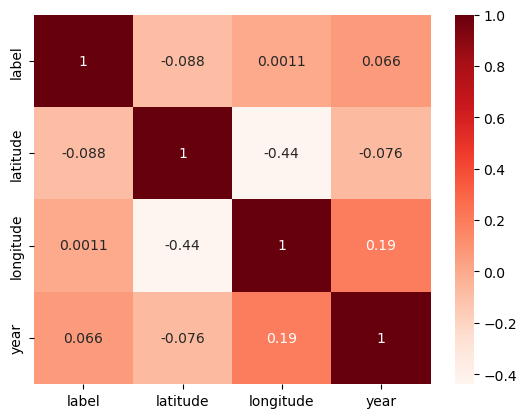

In [138]:
#Lets fin correlation in the data frame
import seaborn as sns
train_data.corr()
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

## Some EDA

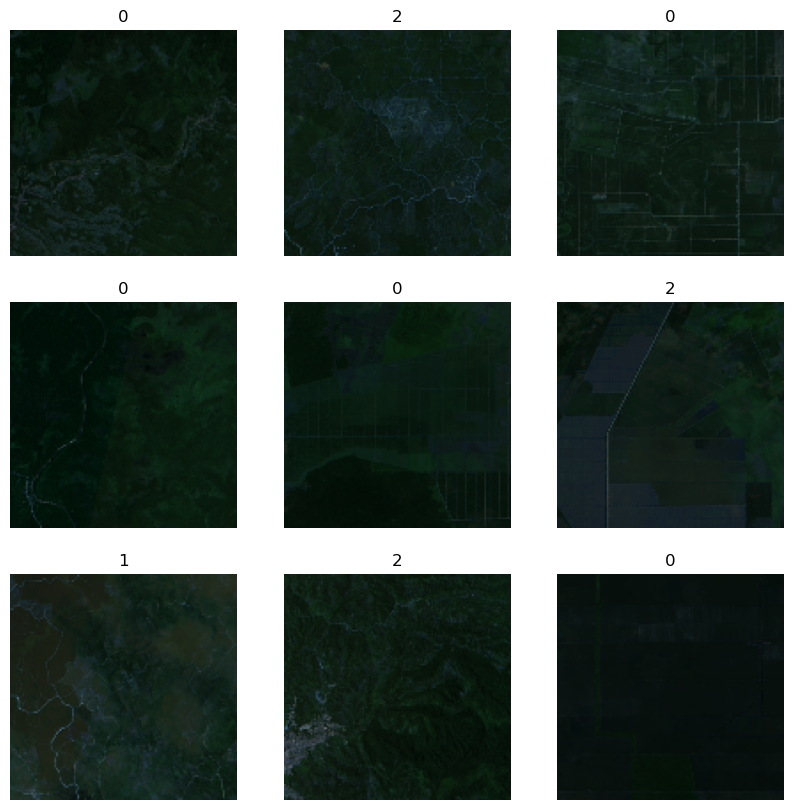

In [139]:
#Lets take a look at the images
#Now lets a look at the data, plottin the first 10 images
plt.figure(figsize=(10, 10))
for i in range(9):
   ax = plt.subplot(3, 3, i + 1)
   plt.imshow(x_train_images[i])
   plt.title(y_train_labels[i].argmax())
   plt.axis("off")
plt.show()

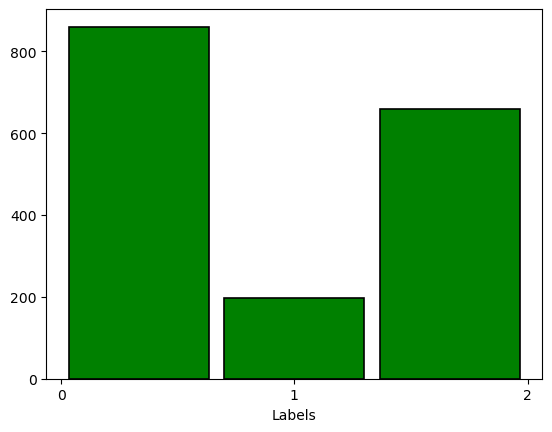

In [140]:
#Lets see the distribution of the labels
plt.hist(y_train_labels.argmax(axis=1), bins=3, rwidth=0.9, color='g', edgecolor='black', linewidth=1.2, align='mid', orientation='vertical')
plt.xlabel('Labels')
plt.xticks([0,1,2])
plt.show()

## Looking for patterns in the data 🧐

/Users/ahmedbegga/miniforge3/envs/datathon/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ahmedbegga/miniforge3/envs/datathon/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1714 samples in 0.024s...
[t-SNE] Computed neighbors for 1714 samples in 5.508s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1714
[t-SNE] Computed conditional probabilities for sample 1714 / 1714
[t-SNE] Mean sigma: 2.151502
[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.630226
[t-SNE] KL divergence after 300 iterations: 2.589293


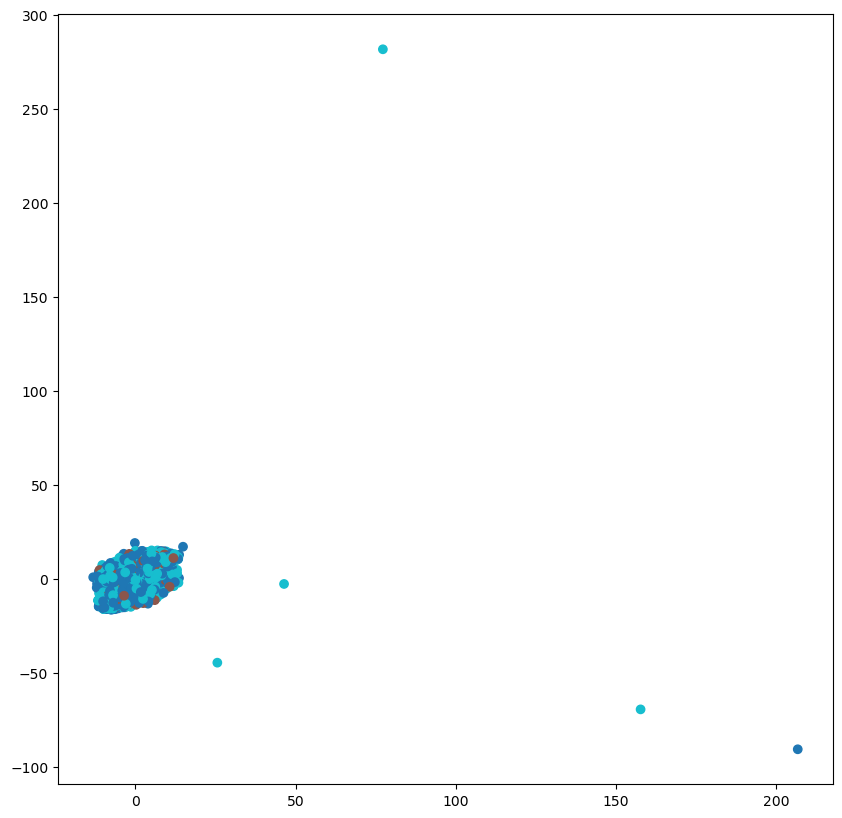

In [141]:
#Now lets make a cluster of the images
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.manifold import TSNE
#With the help of TSNE we will reduce the dimensionality of the data
X  = x_train_images.reshape(x_train_images.shape[0], 128*128*3)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
plt.figure(figsize=(10,10))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=y_train_labels.argmax(axis=1), cmap='tab10')
plt.show()


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1714 samples in 0.002s...
[t-SNE] Computed neighbors for 1714 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1714
[t-SNE] Computed conditional probabilities for sample 1714 / 1714
[t-SNE] Mean sigma: 1.113913


/Users/ahmedbegga/miniforge3/envs/datathon/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ahmedbegga/miniforge3/envs/datathon/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.314270
[t-SNE] KL divergence after 300 iterations: 0.648858


<AxesSubplot: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

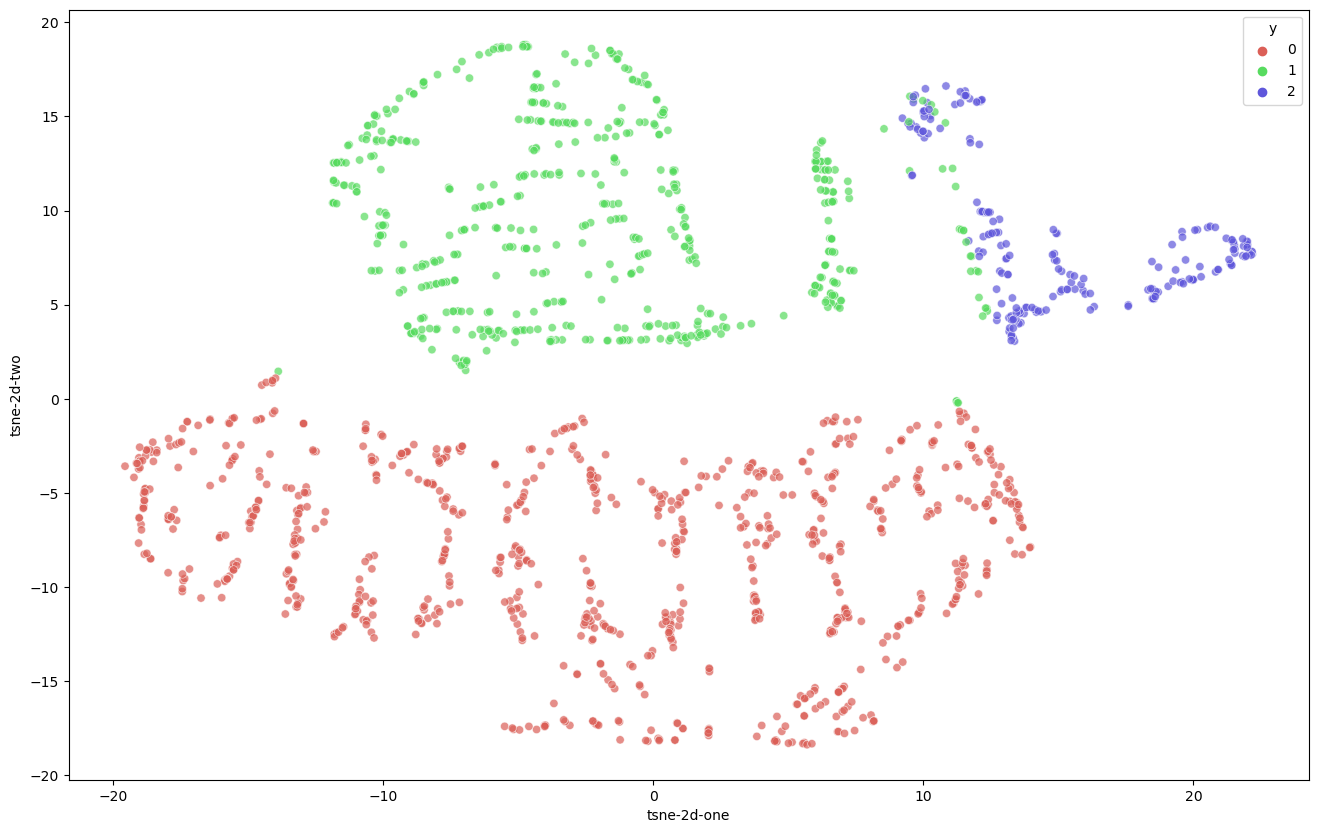

In [142]:
#Now lets make a cluster of the data
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.manifold import TSNE
X = x_train_data[:,:-1]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

feat_cols = [ 'time'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = kmeans.labels_

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_train_data)

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.7
)

## Now we are going to train diferent models 🤖

### Befoer we start we need to split the data in a stratified way 📊

Statistics of the training data
Number of training examples = 1371
Number of validation examples = 343
NUmber of training features = 1371
Number of validation features = 343
x_train shape: (1371, 128, 128, 3)
y_train shape: (1371, 3)
x_val shape: (343, 128, 128, 3)
y_val shape: (343, 3)
x_train_features shape: (1371, 3)
y_train_features shape: (1371, 3)
x_val_features shape: (343, 3)
y_val_features shape: (343, 3)


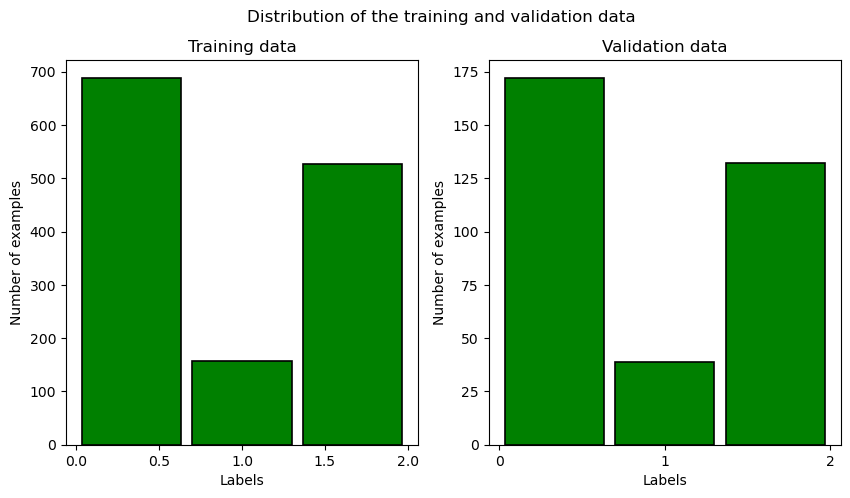

In [143]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_images, y_train_labels, test_size=0.2, random_state=42, stratify=y_train_labels)
x_train_features, x_val_features, y_train_features, y_val_features = train_test_split(x_train_data, y_train_labels, test_size=0.2, random_state=42, stratify=y_train_labels)
print("Statistics of the training data")
print("Number of training examples = " + str(x_train.shape[0]))
print("Number of validation examples = " + str(x_val.shape[0]))
print("NUmber of training features = " + str(x_train_features.shape[0]))
print("Number of validation features = " + str(x_val_features.shape[0]))
print("x_train shape: " + str(x_train.shape))
print("y_train shape: " + str(y_train.shape))
print("x_val shape: " + str(x_val.shape))
print("y_val shape: " + str(y_val.shape))
print("x_train_features shape: " + str(x_train_features.shape))
print("y_train_features shape: " + str(y_train_features.shape))
print("x_val_features shape: " + str(x_val_features.shape))
print("y_val_features shape: " + str(y_val_features.shape))
fig , ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Distribution of the training and validation data')
ax[0].hist(y_train.argmax(axis=1), bins=3, rwidth=0.9, color='g', edgecolor='black', linewidth=1.2, align='mid', orientation='vertical')
ax[0].set_ylabel('Number of examples') 
ax[0].set_xlabel('Labels')
ax[0].set_title('Training data')
ax[1].hist(y_val.argmax(axis=1), bins=3, rwidth=0.9, color='g', edgecolor='black', linewidth=1.2, align='mid', orientation='vertical')
ax[1].set_ylabel('Number of examples') 
ax[1].set_xlabel('Labels')
ax[1].set_title('Validation data')
plt.xticks([0,1,2])
plt.show()

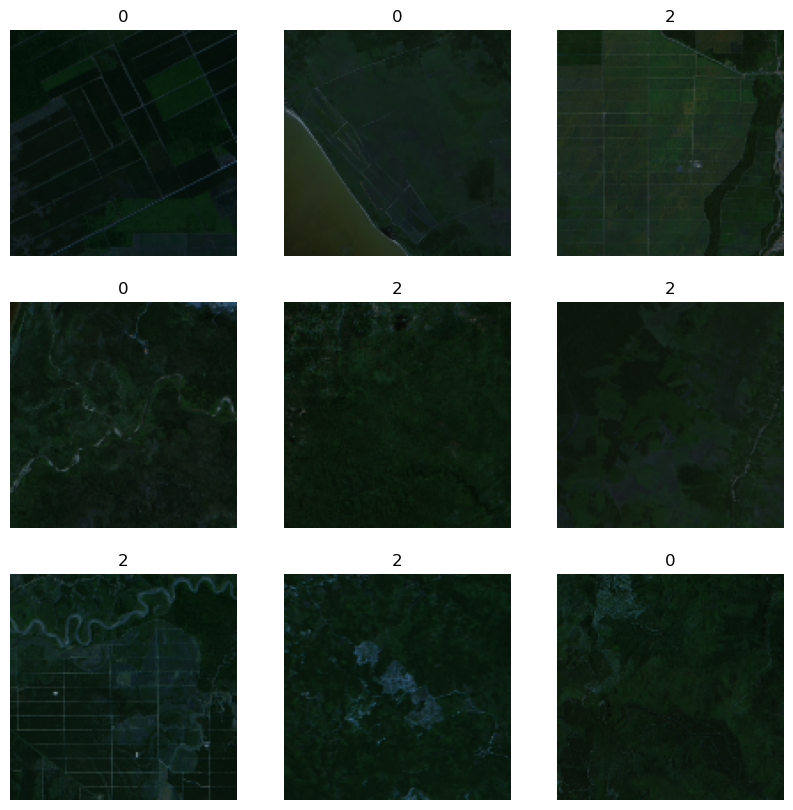

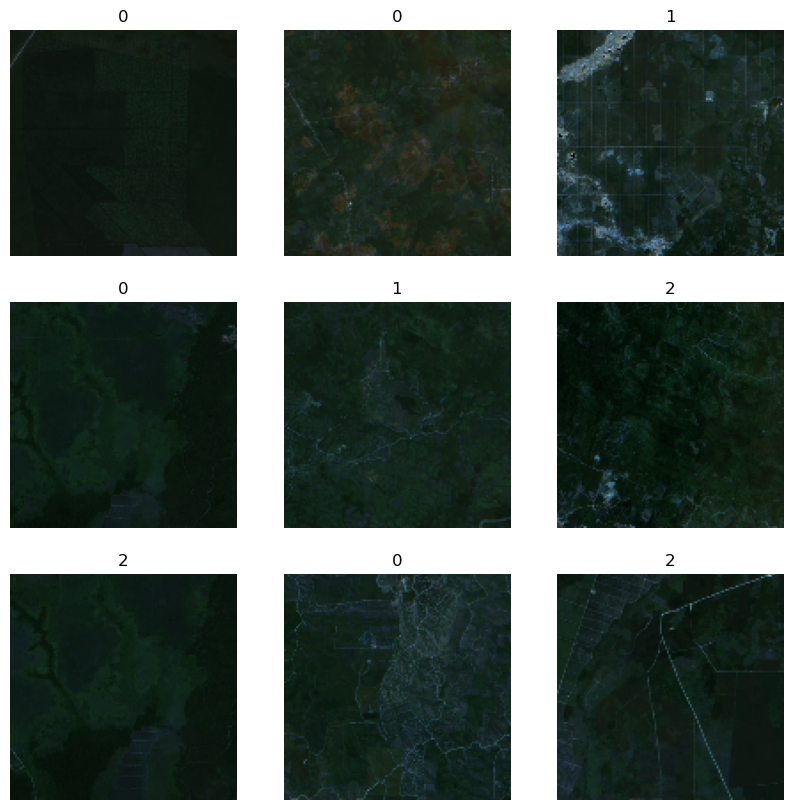

In [144]:
#Lets take a look at the images
#Now lets a look at the data, plottin the first 10 images
plt.figure(figsize=(10, 10))
for i in range(9):
   ax = plt.subplot(3, 3, i + 1)
   plt.imshow(x_train[i])
   plt.title(y_train[i].argmax())
   plt.axis("off")
plt.show()
#Lets take a look at the images
#Now lets a look at the data, plottin the first 10 images
plt.figure(figsize=(10, 10))
for i in range(9):
   ax = plt.subplot(3, 3, i + 1)
   plt.imshow(x_val[i])
   plt.title(y_val[i].argmax())
   plt.axis("off")
plt.show()

### First model: Handmade model 👀

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 batch_normalization_38 (Bat  (None, 126, 126, 16)     64        
 chNormalization)                                                
                                                                 
 dropout_118 (Dropout)       (None, 126, 126, 16)      0         
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 flatten_70 (Flatten)        (None, 63504)             0         
                                                                 
 dense_138 (Dense)           (None, 64)              

2022-11-19 23:42:43.777552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - ETA: 0s - loss: 1.9662 - accuracy: 0.4245

2022-11-19 23:42:49.895590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 8s 77ms/step - loss: 1.9662 - accuracy: 0.4245 - val_loss: 0.9837 - val_accuracy: 0.4519
Epoch 2/10
86/86 [==============================] - 5s 58ms/step - loss: 0.9664 - accuracy: 0.5303 - val_loss: 0.9949 - val_accuracy: 0.4636
Epoch 3/10
86/86 [==============================] - 5s 58ms/step - loss: 0.8285 - accuracy: 0.6098 - val_loss: 1.0327 - val_accuracy: 0.5015
Epoch 4/10
86/86 [==============================] - 5s 54ms/step - loss: 0.6344 - accuracy: 0.7381 - val_loss: 1.0748 - val_accuracy: 0.4956
Epoch 5/10
86/86 [==============================] - 5s 54ms/step - loss: 0.4312 - accuracy: 0.8381 - val_loss: 1.0133 - val_accuracy: 0.4752
Epoch 6/10
86/86 [==============================] - 5s 62ms/step - loss: 0.2485 - accuracy: 0.9227 - val_loss: 1.1951 - val_accuracy: 0.4169
Epoch 7/10
86/86 [==============================] - 5s 55ms/step - loss: 0.1558 - accuracy: 0.9570 - val_loss: 1.6819 - val_accuracy: 0.4548
Epoch 8/10
86/86 [======

2022-11-19 23:43:35.234235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 29ms/step
F1 score:  0.3174704370179949


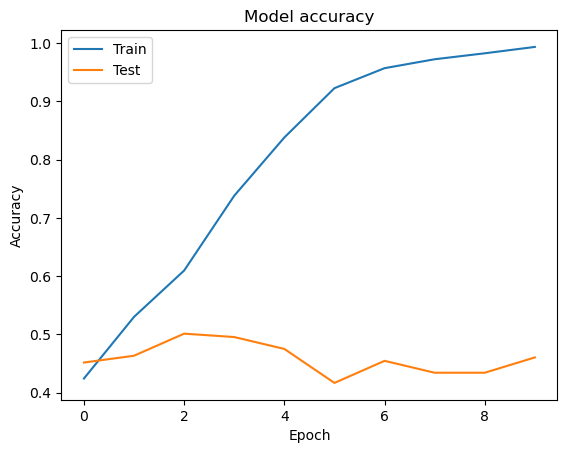

In [156]:
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from sklearn.metrics import f1_score
# Create structure of Convolutional Neural Network
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_images, y_train_labels, test_size=0.2, random_state=1234, stratify=y_train_labels)

def own_model():
    model = Sequential()
    #model.add(Flatten(input_shape=(128,128,3)))
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    #model.add(Dense(512, activation='relu'))
    #model.add(keras.layers.Dropout(0.8))
    #model.add(Dense(128, activation='relu'))
    #model.add(keras.layers.Dropout(0.8))
    model.add(Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.25))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer=k.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model
model = own_model()
print(model.summary())
history_own = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("F1 score: ", f1_score(y_val.argmax(axis=1), model.predict(x_val).argmax(axis=1), average='macro'))
# Plot training & validation accuracy values
plt.plot(history_own.history['accuracy'])
plt.plot(history_own.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

43/43 [==============================] - 1s 23ms/step


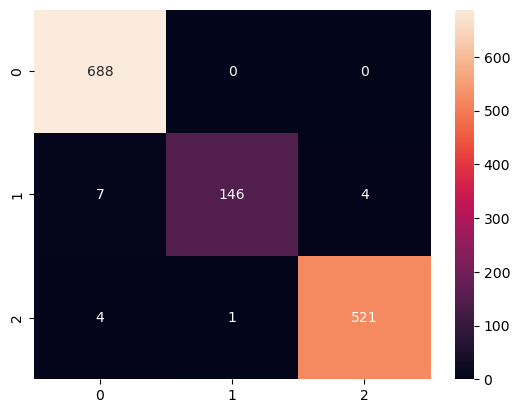

11/11 [==============================] - 0s 21ms/step
F1 score:  0.3174704370179949
11/11 [==============================] - 0s 21ms/step


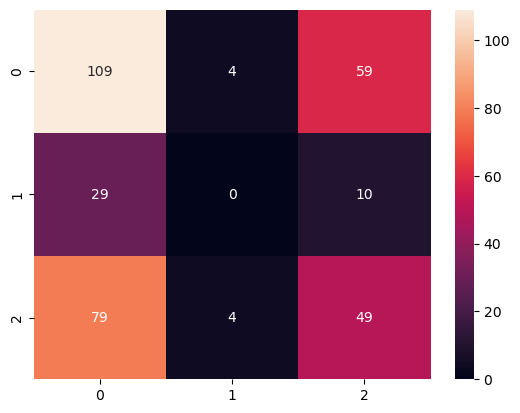

11/11 [==============================] - 0s 21ms/step
F1 score:  0.3174704370179949


In [159]:
#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
sn.heatmap(confusion_matrix(y_train.argmax(axis=1), model.predict(x_train).argmax(axis=1)), annot=True, fmt='d')
plt.show()
#Now print the f1 score
print("F1 score: ", f1_score(y_val.argmax(axis=1), model.predict(x_val).argmax(axis=1), average='macro'))
#confusion_matrix(y_val.argmax(axis=1), model_resnet.predict(x_val).argmax(axis=1))
sn.heatmap(confusion_matrix(y_val.argmax(axis=1), model.predict(x_val).argmax(axis=1)), annot=True, fmt='d')
plt.show()
#Now print the f1 score
print("F1 score: ", f1_score(y_val.argmax(axis=1), model.predict(x_val).argmax(axis=1), average='macro'))

In [173]:
x_test_data = pd.read_csv('test.csv')
x_test_data.head()

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png
3,0.901765,114.042495,2016,train_test_data/test/351.png
4,1.911210,100.829633,2008,train_test_data/test/1001.png


In [175]:
x_test_data['file_name'] = x_test_data['example_path'].apply(lambda st: st[st.find("test/")+5:st.find(".")])

In [177]:
x_test_data['class_predicted'] = model.predict(x_test).argmax(axis=1)

20/20 [==============================] - 1s 29ms/step


In [179]:
predict_dic = dict(zip(x_test_data['file_name'], x_test_data['class_predicted']))
export_json = {"target" : predict_dic }


In [182]:
import json
json_object = json.dumps(export_json) 
with open('predictions.json', 'w') as f:
  f.write(json_object)

In [161]:
results_json = test_results.to_json('predictions.json',orient = 'columns')

## Now we are going to train the same custom model, but with data augmentation 🤨

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_89 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_28 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 dropout_94 (Dropout)        (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 flatten_58 (Flatten)        (None, 127008)            0         
                                                                 
 dense_110 (Dense)           (None, 64)              

2022-11-19 22:58:08.922310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - ETA: 0s - loss: 1.0843 - accuracy: 0.5018

2022-11-19 22:58:19.747314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 12s 130ms/step - loss: 1.0843 - accuracy: 0.5018 - val_loss: 1.0657 - val_accuracy: 0.4023
Epoch 2/10
86/86 [==============================] - 11s 127ms/step - loss: 1.0596 - accuracy: 0.5018 - val_loss: 1.0425 - val_accuracy: 0.4227
Epoch 3/10
86/86 [==============================] - 12s 138ms/step - loss: 1.0394 - accuracy: 0.5018 - val_loss: 1.0244 - val_accuracy: 0.4227
Epoch 4/10
86/86 [==============================] - 10s 117ms/step - loss: 1.0230 - accuracy: 0.5018 - val_loss: 1.0126 - val_accuracy: 0.4023
Epoch 5/10
86/86 [==============================] - 10s 115ms/step - loss: 1.0101 - accuracy: 0.5018 - val_loss: 1.0097 - val_accuracy: 0.3819
Epoch 6/10
86/86 [==============================] - 11s 128ms/step - loss: 0.9997 - accuracy: 0.5018 - val_loss: 1.0228 - val_accuracy: 0.3761
Epoch 7/10
86/86 [==============================] - 10s 111ms/step - loss: 0.9917 - accuracy: 0.5018 - val_loss: 1.0576 - val_accuracy: 0.3761
Epoch 8/10

2022-11-19 22:59:55.647954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 55ms/step
F1 score:  0.18779354050054686


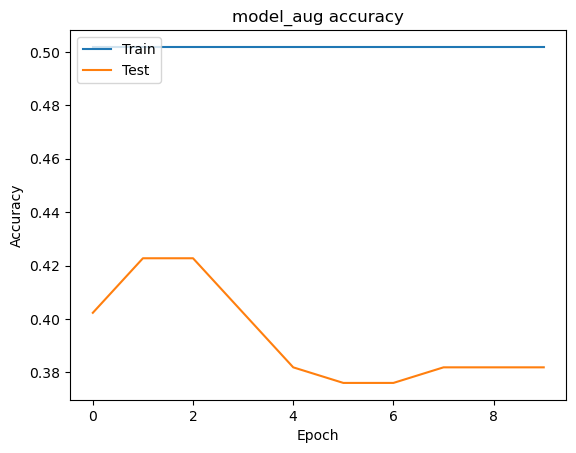

In [128]:
model_aug = own_model()
print(model.summary())

aug = tf.keras.preprocessing.image.ImageDataGenerator(
                        #rotation_range=20, 
                        #zoom_range=0.15,
                        width_shift_range=0.2, 
                        height_shift_range=0.2,
                        brightness_range=[0.2,1.0],
                        #shear_range=0.15,
                        horizontal_flip=True, 
                        fill_mode="nearest")
history_own = model_aug.fit(aug.flow(x_train, y_train, batch_size=16), epochs=10, verbose=1, validation_data=(x_val, y_val))
score = model_aug.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("F1 score: ", f1_score(y_val.argmax(axis=1), model_aug.predict(x_val).argmax(axis=1), average='macro'))
# Plot training & validation accuracy values
plt.plot(history_own.history['accuracy'])
plt.plot(history_own.history['val_accuracy'])
plt.title('model_aug accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

11/11 [==============================] - 1s 59ms/step


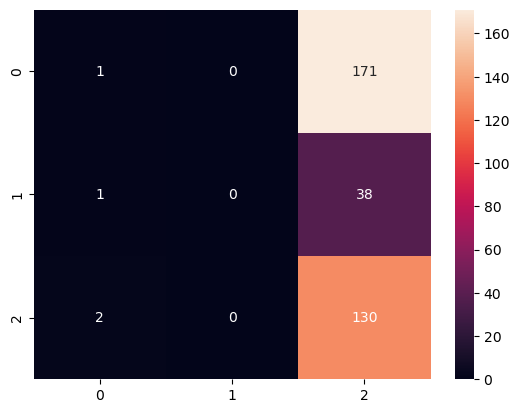

In [129]:
sn.heatmap(confusion_matrix(y_val.argmax(axis=1), model_aug.predict(x_val).argmax(axis=1)), annot=True, fmt='d')
plt.show()

###  Now we are going to train a model with transfer learning 🤯

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_62 (Flatten)        (None, 2048)              0         
                                                                 
 dense_118 (Dense)           (None, 400)               819600    
                                                                 
 dropout_102 (Dropout)       (None, 400)               0         
                                                                 
 dense_119 (Dense)           (None, 500)               200500    
                                                                 
 dropout_103 (Dropout)       (None, 500)               0         
                                                                 
 dense_120 (Dense)           (None, 256)             

2022-11-19 23:14:58.198492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - ETA: 0s - loss: 1.6020 - accuracy: 0.4581

2022-11-19 23:16:00.742521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 77s 715ms/step - loss: 1.6020 - accuracy: 0.4581 - val_loss: 22146.0469 - val_accuracy: 0.5015
Epoch 2/10
86/86 [==============================] - 33s 386ms/step - loss: 1.4159 - accuracy: 0.4938 - val_loss: 1.9217 - val_accuracy: 0.3848
Epoch 3/10
86/86 [==============================] - 24s 276ms/step - loss: 1.3736 - accuracy: 0.4960 - val_loss: 2.8741 - val_accuracy: 0.5015
Epoch 4/10
86/86 [==============================] - 25s 288ms/step - loss: 1.3300 - accuracy: 0.4960 - val_loss: 1.5439 - val_accuracy: 0.3907
Epoch 5/10
86/86 [==============================] - 25s 289ms/step - loss: 1.2897 - accuracy: 0.4894 - val_loss: 1.2717 - val_accuracy: 0.5015
Epoch 6/10
86/86 [==============================] - 26s 301ms/step - loss: 1.2613 - accuracy: 0.4982 - val_loss: 1.4373 - val_accuracy: 0.5015
Epoch 7/10
86/86 [==============================] - 26s 305ms/step - loss: 1.2356 - accuracy: 0.4967 - val_loss: 1.3469 - val_accuracy: 0.5015
Epoch 

2022-11-19 23:20:12.877269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 5s 286ms/step
F1 score:  0.22265372168284792


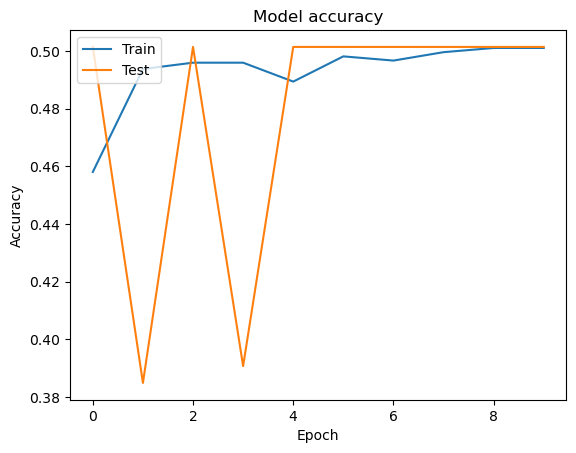

In [131]:
from keras.applications import ResNet50
from keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import concatenate
def Resnet():
    model = Sequential()
    model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
    model.add(layers.Flatten())
    model.add(Dense(400,activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
    model.add(Dropout(0.2))
    model.add(Dense(500,activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
    model.add(Dropout(0.2))
    model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer=k.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    print(model.summary())
    return model
model = Resnet()
print(model.summary())
history_own = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("F1 score: ", f1_score(y_val.argmax(axis=1), model.predict(x_val).argmax(axis=1), average='macro'))
# Plot training & validation accuracy values
plt.plot(history_own.history['accuracy'])
plt.plot(history_own.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

11/11 [==============================] - 1s 81ms/step


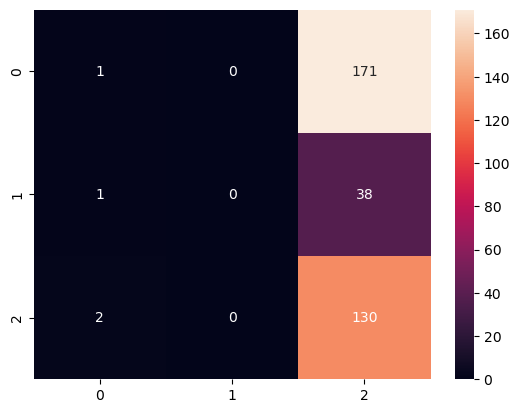

In [132]:
sn.heatmap(confusion_matrix(y_val.argmax(axis=1), model_aug.predict(x_val).argmax(axis=1)), annot=True, fmt='d')
plt.show()

In [ ]:
#Failed Idea to use multichannel, because there is not enough correlation between the channels
def ResNetMultiChannel():
    model = Sequential()
    #Channel 1
    input1 = layers.Input(shape=(128,128,3))
    x = ResNet50(include_top=False, pooling='avg', weights='imagenet')(input1)
    x = layers.Flatten()(x)
    x = Dense(400,activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5))(x)
    x = Dropout(0.2)(x)
    x = Dense(500,activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5))(x)
    x = Dropout(0.2)(x)
    x = Dense(256,activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5))(x)    
    z_embedding_images = Dense(3, activation='softmax',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5))(x)
    z_embedding_images = Flatten()(z_embedding_images)
    
    #Channel 2
    input2 = layers.Input(shape=(3))
    features= Flatten()(input2)
    f = Dense(128, activation='relu')(features)
    f = Dense(64, activation='relu')(f)
    f = Dropout(0.2)(f)
    f = Dense(32, activation='relu')(f)
    z_embedding_features = Dense(3, activation='softmax')(f)
    z_embedding_features = Flatten()(z_embedding_features)
    
    
    print("Sizes of embeddings:")
    print(z_embedding_images.shape)
    print(z_embedding_features.shape)
    merged = concatenate([z_embedding_images, z_embedding_features])
    print("Size of merged embeddings:")
    print(merged.shape)
    
    dense2 = Dense(32, activation='relu')(merged)
    print("Size of dense2:")
    dense3 = Dense(16, activation='relu')(dense2)
    output = Dense(3, activation='softmax')(dense3)
    model = k.Model(inputs=[input1,input2], outputs=output)
    model.compile(loss="categorical_crossentropy", optimizer=k.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    print(model.summary())
    return model

## Now we are going to train a model with transfer learning and data augmentation 🤯

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_63 (Flatten)        (None, 2048)              0         
                                                                 
 dense_122 (Dense)           (None, 400)               819600    
                                                                 
 dropout_104 (Dropout)       (None, 400)               0         
                                                                 
 dense_123 (Dense)           (None, 500)               200500    
                                                                 
 dropout_105 (Dropout)       (None, 500)               0         
                                                                 
 dense_124 (Dense)           (None, 256)             

2022-11-19 23:23:10.755709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - ETA: 0s - loss: 1.3806 - accuracy: 0.4551

2022-11-19 23:23:47.979228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 45s 430ms/step - loss: 1.3806 - accuracy: 0.4551 - val_loss: 1.2810 - val_accuracy: 0.5015
Epoch 2/10
86/86 [==============================] - 26s 303ms/step - loss: 1.2439 - accuracy: 0.4872 - val_loss: 1.2939 - val_accuracy: 0.5015
Epoch 3/10
86/86 [==============================] - 28s 326ms/step - loss: 1.1993 - accuracy: 0.4843 - val_loss: 1.2399 - val_accuracy: 0.5015
Epoch 4/10
86/86 [==============================] - 29s 340ms/step - loss: 1.1626 - accuracy: 0.5004 - val_loss: 1.1954 - val_accuracy: 0.5015
Epoch 5/10
86/86 [==============================] - 27s 308ms/step - loss: 1.1347 - accuracy: 0.4880 - val_loss: 1.3233 - val_accuracy: 0.5015
Epoch 6/10
86/86 [==============================] - 27s 317ms/step - loss: 1.1131 - accuracy: 0.5018 - val_loss: 2.2783 - val_accuracy: 0.5015
Epoch 7/10
86/86 [==============================] - 29s 325ms/step - loss: 1.0921 - accuracy: 0.5018 - val_loss: 3.4436 - val_accuracy: 0.5015
Epoch 8/10

2022-11-19 23:28:12.607564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 7s 381ms/step
F1 score:  0.22265372168284792


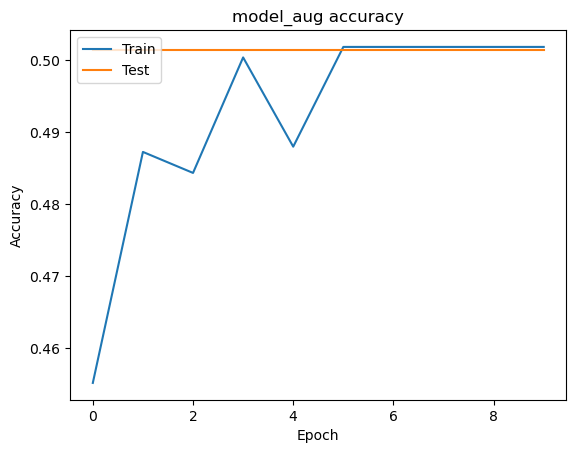

In [133]:
model_aug = Resnet()
print(model.summary())

aug = tf.keras.preprocessing.image.ImageDataGenerator(
                        #rotation_range=20, 
                        #zoom_range=0.15,
                        width_shift_range=0.2, 
                        height_shift_range=0.2,
                        brightness_range=[0.2,1.0],
                        #shear_range=0.15,
                        horizontal_flip=True, 
                        fill_mode="nearest")
history_own = model_aug.fit(aug.flow(x_train, y_train, batch_size=16), epochs=10, verbose=1, validation_data=(x_val, y_val))
score = model_aug.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("F1 score: ", f1_score(y_val.argmax(axis=1), model_aug.predict(x_val).argmax(axis=1), average='macro'))
# Plot training & validation accuracy values
plt.plot(history_own.history['accuracy'])
plt.plot(history_own.history['val_accuracy'])
plt.title('model_aug accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

11/11 [==============================] - 1s 136ms/step


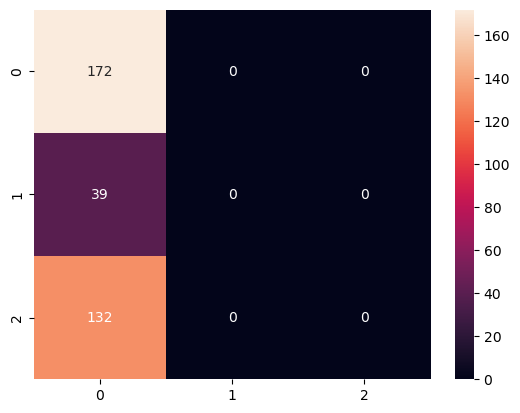

In [134]:
sn.heatmap(confusion_matrix(y_val.argmax(axis=1), model_aug.predict(x_val).argmax(axis=1)), annot=True, fmt='d')
plt.show()